In [1]:
from PIL import Image, ImageFilter
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from os.path import join
from colorharmony.cloth import load_colortable_as_dict
%matplotlib inline

In [115]:
image = Image.open(join("clothes_images", "M9121N0QY-Q11@12.jpg"))

In [116]:
x_size = 64*8
y_size = 92*8

In [117]:
image_threshold = image.convert(mode="L").point(lambda i: i < 245 and 255)
image.putalpha(image_threshold)
image = image.resize((x_size, y_size), Image.LANCZOS)
image.show()

In [118]:
image_data = np.array(image.getdata())
image_data.shape

(376832, 4)

In [119]:
kmeans = KMeans(n_clusters=4, random_state=101).fit(image_data)

In [120]:
kmeans.cluster_centers_

array([[2.94531959e-02, 2.94531959e-02, 2.94496206e-02, 4.22956190e-03],
       [2.01592410e+01, 2.02366242e+01, 1.95006287e+01, 2.54896834e+02],
       [1.65425695e+02, 1.65586769e+02, 1.65669703e+02, 2.18936242e+02],
       [2.40879079e+02, 2.40886461e+02, 2.40799203e+02, 5.50038388e+01]])

In [121]:
cluster_centers_rounded = np.vectorize(lambda x: x/255)(kmeans.cluster_centers_)

In [122]:
colorname_dict = load_colortable_as_dict()

In [123]:
{colorname_dict[tuple(center[:-1])]: sum(kmeans.labels_ == i) for i,center in enumerate(kmeans.cluster_centers_) 
     if center[-1] > 1}

{'black': 88275, 'pastel purple': 2086, 'lavender blush': 6773}

In [124]:
sum(kmeans.labels_ == 0)

279698

In [125]:
image_clustered = np.reshape(np.array([cluster_centers_rounded[label] for label in kmeans.labels_]), 
                             newshape=(y_size, x_size,4))

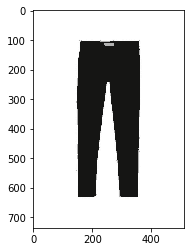

In [126]:
plt.imshow(image_clustered)